# Final Project

Tony Nguyen

CPSC 222 01

Dr. Gina Sprint

December 13th, 2022

In [1]:
import utils
import importlib

importlib.reload(utils)

<module 'utils' from '/Users/tony/Documents/Python/CPSC222/FinalProject/utils.py'>

## Introduction
 
For our class’s final project, I choose to work primarily with my **Apple Health Sleep Data** and **Netflix Watching History**.

Throughout this project, I want to learn more about my sleep history, precisely how long I would sleep each night on average. I realize that it is instrumental in having a decent amount of sleep since we are all working in a highly academic-demanding environment; thus, being able to sleep well is one of the easiest ways to prevent ourselves from burning out.

 
I am a big Netflix user. Watching series on Netflix is one of my ways to relax after school and work. Therefore, I want to know if there would be a correlation between the number of series episodes or movies I watched and the total time I got to sleep each night.
 

I will be comparing my sleep time with reference to a number of Netflix movies or shows (I mostly watch everything on Netflix) to see if there is a difference between the Spring 2022 and Fall 2022 semesters at Gonzaga. I anticipate my sleep time in the Fall 2022 semester will be less than in Spring 2022, as I am taking more classes in the Fall and working more hours.


For the classification task that I will perform later after merging all data, I want to classify it on the day of the week based on other attributes available. The machine learning model I build shall be able to predict which day of the week it is based on my sleep time and the number of Netflix content I have watched.


I hope the result of this project can provide a glimpse of my sleep routine, something that I usually take for granted without thinking much about how much I had actually slept the night before. At the same time, I want to know if Netflix would play a role in my sleep routine since I find myself binge watch a lot. Besides, as Apple Health Data is pervasive that covers other data types, hopefully, in the future, I can do some further analysis with other health data and find something interesting like this one.


About stakeholders interested in this project, the information might be helpful for anyone interested in investigating about effects of a movie/series on the viewer, for example, neuroscientists, movie makers, and more. The scope of this project can be extended more to find if watching a movie/series can affect one's emotional well-being, as I think sleeping significantly correlates to that topic. 

### Apple Health Sleep Dataset
 
The original Apple Health Dataset takeout contains several tables in different formats, including electrocardiogram in CSV, workout routes in GPX, clinical health reports in JSON, and an XML with other data points that my phone and my watch collected. The file type I will be working with is XML.
 

In this original XML file called `export.xml`, there are multiple entries for different types of health information, including the sleep data I need. And since this XML file is too big, at approximately 390MB, it takes my computer a very long time to work with if I load it directly into a DataFrame. It is essentially unwise since I will need to re-run this notebook multiple times during my coding process.

 
Therefore, in the file `healthdata_preprocessing.py`, I load the original XML file into a DataFrame, then export it to a CSV file called `export_converted.csv`. Although the exported CSV size is still relatively big at roughly 260MB, the time it takes to run is significantly faster.

 
From this point forward, I will use the CSV file to work with the health data. After the format conversion, there is a total of 946,979 instances across different data types. The attributes of this dataset are as follows:
* `type`: Type of data point. I use this one to filter sleep data later.
* `sourceName`: Where does that data come from. The common instances are my iPhone and my Apple Watch. There are also other instances, such as the Health app or *MyChart*, the portal that my hospital use.
* `sourceVersion`: The software version of `sourceName`.
* `unit`: The unit of data records. Depending on which type of data it is, there will be a corresponding unit.
* `creationDate`: The time when an instance is logged.
* `startDate`: For those entries that record a period, this is the time when the record starts. 
* `endDate`: For those entries that record a period, this is the time when the record ends. 
* `value`: The value of a record. E.g., duration of sleep for sleep data
* `device`: Hardware information, if applicable. It contains `sourceName`'s name, manufacturer, model, hardware version, and software version.
* `MetadataEntry`: Include a key-value pair.
* `HeartRateVariabilityMetadataList`: For heart rate data, record a list of Instantaneous Beat Per Minute.
 

Apple has a specific sleep mode that I have been using to record my sleep information. Every night just before I put my phone down and go to sleep, I turn sleep mode on, which prompts the phone to start counting my sleep time. And the following day, at the wake-up time that I set earlier, it will begin playing the alarm sound from quieter to louder to not abruptly wake me up, which can deliver a better sleep experience. If I wake up during the night and go back to sleep later, it can subtract the actual time that I am awake from my sleep time. The process can get even more precise if paired with an Apple Watch, which can analyze different sleep stages and respiratory rates. This information can be beneficial for further analysis. Still, since I do not wear my watch to sleep most of the time, I decided not to include those sleep stages information as they are insufficient daily. Read more about Apple's sleep mode [here](https://support.apple.com/en-us/HT211685).
 

**Important Notes**: 
1. In order for the `pandas.read_xml()` function to work, I manually remove the first 213 lines (out of 1,443,267 lines) in the XML file. Those 213 lines are Apple's description of how to interpret the instances.
1. When I exported the data, Apple returned a dataset with all of the instances' timestamps in Pacific Standard Time (PST), based on my current time zone. As I travel back and forth occasionally between the U.S. and Vietnam, some instances are recorded in different time zones and converted back to PST. This results in some instances that have sleep time started to record at unconventional times, such as in the middle of the day, which may cause inaccuracy when performing analysis.


### Netflix Viewing History Dataset
The Netflix data comes in a CSV format, which contains my viewing history since I start using the service. This dataset only has a table that has the following attributes:
* `Title`: The name of a movie or a series episode.
* `Date`: The watch date. Since Netflix does not provide additional information about the specific time that I watch or which time zone that information is recorded in, I assume they are recorded based on my watch location, which may have different time zones.
 
There are 2,578 instances in this dataset, lasting from January 25, 2020, to November 29, 2022 - the point I downloaded this dataset.

## Data Analysis
### Apple Health Dataset
#### Data Preparation and Cleaning
From the converted CSV file of the preprocessing step, I loaded them into a pandas DataFrame. I also convert `creationDate`, `startDate`, and `endDate` into datetime format.

In [2]:
df = utils.load_apple()
df.tail(10)

,originalIndex,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,MetadataEntry,HeartRateVariabilityMetadataList
946970,946970,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-27 14:29:24-08:00,2022-11-27 14:28:23-08:00,2022-11-27 14:29:22-08:00,72.2227,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946971,946971,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-27 16:26:12-08:00,2022-11-27 16:25:01-08:00,2022-11-27 16:25:57-08:00,44.5048,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946972,946972,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-27 18:30:47-08:00,2022-11-27 18:29:46-08:00,2022-11-27 18:30:46-08:00,26.2327,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946973,946973,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 08:00:59-08:00,2022-11-28 07:59:58-08:00,2022-11-28 08:00:58-08:00,27.0778,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946974,946974,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 08:47:54-08:00,2022-11-28 08:46:53-08:00,2022-11-28 08:47:52-08:00,21.1496,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946975,946975,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 10:24:48-08:00,2022-11-28 10:23:47-08:00,2022-11-28 10:24:46-08:00,24.8409,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946976,946976,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 12:28:40-08:00,2022-11-28 12:27:39-08:00,2022-11-28 12:28:39-08:00,13.0849,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946977,946977,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 14:23:52-08:00,2022-11-28 14:22:51-08:00,2022-11-28 14:23:45-08:00,17.1092,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946978,946978,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 16:34:54-08:00,2022-11-28 16:33:53-08:00,2022-11-28 16:34:53-08:00,26.8948,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946979,946979,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 18:23:48-08:00,2022-11-28 18:22:47-08:00,2022-11-28 18:23:47-08:00,13.2906,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN


Since this project concerns only my sleep data, I will filter out those instances whose data is sleep.

In [3]:
df = utils.sleep_filtering(df)
df.tail(10)

,originalIndex,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,MetadataEntry,HeartRateVariabilityMetadataList
937029,937029,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-19 08:00:03-08:00,2022-11-18 23:58:22-08:00,2022-11-19 07:28:58-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937030,937030,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-20 09:09:31-08:00,2022-11-20 03:14:28-08:00,2022-11-20 09:09:19-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937031,937031,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-21 06:56:37-08:00,2022-11-21 00:52:02-08:00,2022-11-21 06:42:47-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937032,937032,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-22 06:45:22-08:00,2022-11-22 00:26:27-08:00,2022-11-22 06:45:22-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937033,937033,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-23 07:09:08-08:00,2022-11-23 00:31:18-08:00,2022-11-23 06:48:28-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937034,937034,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-24 06:40:01-08:00,2022-11-24 00:20:11-08:00,2022-11-24 06:40:00-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937035,937035,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-25 08:39:16-08:00,2022-11-25 03:14:23-08:00,2022-11-25 08:39:16-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937036,937036,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-27 07:16:44-08:00,2022-11-27 02:11:47-08:00,2022-11-27 06:40:18-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937037,937037,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-28 06:40:45-08:00,2022-11-27 23:32:00-08:00,2022-11-28 06:40:45-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937038,937038,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-29 06:40:15-08:00,2022-11-29 00:13:46-08:00,2022-11-29 06:40:14-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN


Next, I drop the following columns as they are not needed for this project: `type`, `sourceName`, `sourceVersion`, `unit`, `value`, `device`, `MetadataEntry`, `HeartRateVariabilityMetadataList`, and `originalIndex`. I decided to drop `originalIndex` as although it might be useful for me if I need to refer to the original dataset later, I also call `reset_index()` function. This function produces another column called `Index`, which is the same as the `originalIndex`; thus, keeping both makes it redundant.

In [4]:
df = utils.sleep_cleaning(df)
df

,index,creationDate,startDate,endDate
0,936101,2016-07-07 15:32:30-08:00,2016-07-07 08:39:56-08:00,2016-07-07 15:32:29-08:00
1,936102,2016-07-08 15:55:36-08:00,2016-07-08 08:30:32-08:00,2016-07-08 08:53:40-08:00
2,936103,2016-07-08 15:55:36-08:00,2016-07-08 08:54:00-08:00,2016-07-08 15:55:35-08:00
3,936104,2016-07-09 17:33:56-08:00,2016-07-09 08:49:44-08:00,2016-07-09 17:33:55-08:00
4,936105,2016-07-10 17:05:15-08:00,2016-07-10 08:29:32-08:00,2016-07-10 17:05:15-08:00
...,...,...,...,...
933,937034,2022-11-24 06:40:01-08:00,2022-11-24 00:20:11-08:00,2022-11-24 06:40:00-08:00
934,937035,2022-11-25 08:39:16-08:00,2022-11-25 03:14:23-08:00,2022-11-25 08:39:16-08:00
935,937036,2022-11-27 07:16:44-08:00,2022-11-27 02:11:47-08:00,2022-11-27 06:40:18-08:00
936,937037,2022-11-28 06:40:45-08:00,2022-11-27 23:32:00-08:00,2022-11-28 06:40:45-08:00


Since Apple does not provide a total time of sleep per each entry, I perform a subtraction of `endDate` and `startDate` to find the sleep time. Then, I concatenate the new-finding result to the DataFrame, named `sleepTime`.

In [5]:
sleepTime, df = utils.time_calculation(df)
df

,index,creationDate,startDate,endDate,sleepTime
0,936101,2016-07-07 15:32:30-08:00,2016-07-07 08:39:56-08:00,2016-07-07 15:32:29-08:00,0 days 06:52:33
1,936102,2016-07-08 15:55:36-08:00,2016-07-08 08:30:32-08:00,2016-07-08 08:53:40-08:00,0 days 00:23:08
2,936103,2016-07-08 15:55:36-08:00,2016-07-08 08:54:00-08:00,2016-07-08 15:55:35-08:00,0 days 07:01:35
3,936104,2016-07-09 17:33:56-08:00,2016-07-09 08:49:44-08:00,2016-07-09 17:33:55-08:00,0 days 08:44:11
4,936105,2016-07-10 17:05:15-08:00,2016-07-10 08:29:32-08:00,2016-07-10 17:05:15-08:00,0 days 08:35:43
...,...,...,...,...,...
933,937034,2022-11-24 06:40:01-08:00,2022-11-24 00:20:11-08:00,2022-11-24 06:40:00-08:00,0 days 06:19:49
934,937035,2022-11-25 08:39:16-08:00,2022-11-25 03:14:23-08:00,2022-11-25 08:39:16-08:00,0 days 05:24:53
935,937036,2022-11-27 07:16:44-08:00,2022-11-27 02:11:47-08:00,2022-11-27 06:40:18-08:00,0 days 04:28:31
936,937037,2022-11-28 06:40:45-08:00,2022-11-27 23:32:00-08:00,2022-11-28 06:40:45-08:00,0 days 07:08:45


#### Number of Awaken Time Calculation and `creationDate` Groupby (Aggregation)
Recall that Apple does not automatically add up the total sleep time per night if there was a disruption during sleep but rather records them as different entries; I manually calculate the number of awakening times by seeing if there are any entries that were recorded more than once on a given `creationDate`.


For Awaken Time Calculation, as I use `groupby()` and `values_count()` functions to find the number of times I was awake, I realize there are some oddly large values that seem suspicious. There are 29 instances that have a weirdly big value, such as `2021-12-29` with 43 awaken times. Therefore, I manually traced these specific values and modified 20 cases. ` values_count()` returns such value because they are the days I wore my Apple Watch to sleep. Apple Watch records sleep stages in the same convention as sleep time; thus, it results in confusion.

 
The other nine instances that I did not modify happen to be the days I was traveling, typically long-haul flights, so I find it makes sense to have such values.

In [6]:
grouped = utils.awaken_time(df)

After having the awaken time, I concatenate them to the DataFrame and perform a split-apply-combine using `groupby()` by date.

In [7]:
df = utils.sleep_groupby(df, grouped)
df

,sleepTime,numberAwake
2016-07-07,0 days 06:52:33,0
2016-07-08,0 days 07:24:43,1
2016-07-09,0 days 08:44:11,0
2016-07-10,0 days 08:35:43,0
2016-07-11,0 days 07:12:21,0
...,...,...
2022-11-24,0 days 06:19:49,0
2022-11-25,0 days 05:24:53,0
2022-11-27,0 days 04:28:31,0
2022-11-28,0 days 07:08:45,0


#### Day of Week Merging
I created a separate CSV file named `dow.csv` with the date and corresponding day of the week. I merge them together with the sleep dataset.
 
The attributes of the CSV file include the following:
* `date`: Date of entry
* `dayOfWeek`: The day of the week corresponding to a given date
 
After merging, here is the DataFrame

In [8]:
df = utils.dow_merge(df)
df

,creationDate,sleepTime,numberAwake,dayOfWeek
0,2016-07-07,0 days 06:52:33,0,Thursday
1,2016-07-08,0 days 07:24:43,1,Friday
2,2016-07-09,0 days 08:44:11,0,Saturday
3,2016-07-10,0 days 08:35:43,0,Sunday
4,2016-07-11,0 days 07:12:21,0,Monday
...,...,...,...,...
445,2022-11-24,0 days 06:19:49,0,Thursday
446,2022-11-25,0 days 05:24:53,0,Friday
447,2022-11-27,0 days 04:28:31,0,Sunday
448,2022-11-28,0 days 07:08:45,0,Monday


### Netflix Data
#### Data Preparation and Cleaning
The Netflix data is relatively simple and does not need any additional cleaning. However, since Netflix no longer provides the actual watch time per entry or the length of an episode or movie for its data takeout, I decide to find the total number of movies/episodes I watch every day to have a general view of how much I have watched daily.

In [9]:
nf = utils.load_netflix()
nf = utils.netflix_count(nf)
nf

,numberWatched
Date,
2020-01-25,1
2020-01-28,1
2020-02-03,1
2020-02-05,1
2020-02-06,1
...,...
2022-11-23,8
2022-11-24,9
2022-11-25,2


#### Netflix Filtering
In this part, as my Netflix Viewing History covers a greater period than my sleep data, I drop instances in the Netflix data that do not have value in the Apple Health Sleep Data. This information will later be used to concatenate with the Sleep DataFrame.

After filtering, the result is as below:

In [10]:
nf = utils.netflix_filtering(df, nf)
nf

,Date,numberWatched
242,2021-07-17,5
243,2021-07-18,6
244,2021-07-19,5
245,2021-07-21,1
246,2021-07-22,7
...,...,...
494,2022-11-22,10
495,2022-11-23,8
496,2022-11-24,9
497,2022-11-25,2


### Apple Health and Netflix Data Merging
From the two different datasets, I perform an outer merge to have both Apple Health Sleep Data and Netflix Viewing History in one table. For those days that the Netflix data does not have an entry, which means I did not watch anything on that day, I will assign a 0 in `numberWatched`, instead of a `NaN/NaT`.

In [11]:
df = utils.sleep_nf_merge(df, nf)
df

,creationDate,sleepTime,numberAwake,dayOfWeek,numberWatched
0,2016-07-07,6.875833,0,Thursday,0.0
1,2016-07-08,7.411944,1,Friday,0.0
2,2016-07-09,8.736389,0,Saturday,0.0
3,2016-07-10,8.595278,0,Sunday,0.0
4,2016-07-11,7.205833,0,Monday,0.0
...,...,...,...,...,...
445,2022-11-24,6.330278,0,Thursday,9.0
446,2022-11-25,5.414722,0,Friday,2.0
447,2022-11-27,4.475278,0,Sunday,0.0
448,2022-11-28,7.145833,0,Monday,0.0


### Semester Split
Here is where I start to split my data into two groups, Fall 22 and Spring 22 semesters, as I want to compare them. 
 

I cannot recall exactly when was the beginning date of Spring 22 since the information was taken down on Gonzaga's website. So, I traced back to the most related email from a class I took in Spring 22, saying its first session was on January 12th, 2022. The data ranges from January 12th, 2022, to May 5th, 2022.
 

For Fall 22, although the semester is not over, I have included all data I have until I export the Apple Health data. The data lasts from August 30th, 2022, to November 29th, 2022.

In [12]:
fall_22, spring_22 = utils.sem_split(df)
print(fall_22)
print(spring_22)

    index creationDate  sleepTime  numberAwake  dayOfWeek  numberWatched
0     369   2022-08-30   5.665278            1    Tuesday            5.0
1     370   2022-08-31   7.863333            0  Wednesday            0.0
2     371   2022-09-01   8.522778            0   Thursday            2.0
3     372   2022-09-02   6.581667            0     Friday            3.0
4     373   2022-09-03   6.858889            2   Saturday            0.0
..    ...          ...        ...          ...        ...            ...
76    445   2022-11-24   6.330278            0   Thursday            9.0
77    446   2022-11-25   5.414722            0     Friday            2.0
78    447   2022-11-27   4.475278            0     Sunday            0.0
79    448   2022-11-28   7.145833            0     Monday            0.0
80    449   2022-11-29   6.441111            0    Tuesday            5.0

[81 rows x 6 columns]
    index creationDate  sleepTime  numberAwake  dayOfWeek  numberWatched
0     183   2022-01-12   5.8

#### Statistic Calculation
After splitting the data into two semesters, Fall 2022 and Spring 2022, below is each data group's statistical information:
 
##### Fall 2022

In [13]:
fall_22.describe()

,index,sleepTime,numberAwake,numberWatched
count,81.000000,81.000000,81.000000,81.000000
mean,409.000000,6.811036,0.358025,1.259259
std,23.526581,1.921921,0.826266,2.245984
min,369.000000,4.475278,0.000000,0.000000
25%,389.000000,5.819444,0.000000,0.000000
50%,409.000000,6.315278,0.000000,0.000000
75%,429.000000,6.965833,0.000000,2.000000
max,449.000000,13.998889,5.000000,10.000000


##### Spring 2022

In [14]:
spring_22.describe()

,index,sleepTime,numberAwake,numberWatched
count,85.000000,85.000000,85.000000,85.000000
mean,225.000000,5.692856,0.376471,1.294118
std,24.681302,1.479429,0.786440,2.028508
min,183.000000,0.071944,0.000000,0.000000
25%,204.000000,4.836111,0.000000,0.000000
50%,225.000000,5.476111,0.000000,0.000000
75%,246.000000,6.607500,0.000000,2.000000
max,267.000000,9.940278,3.000000,7.000000


### Data Visualization
As I find the hour of sleep time and the number of Netflix movies/shows watched per day are the two most essential attributes in this project, I plot two plots below to visualize their differences.

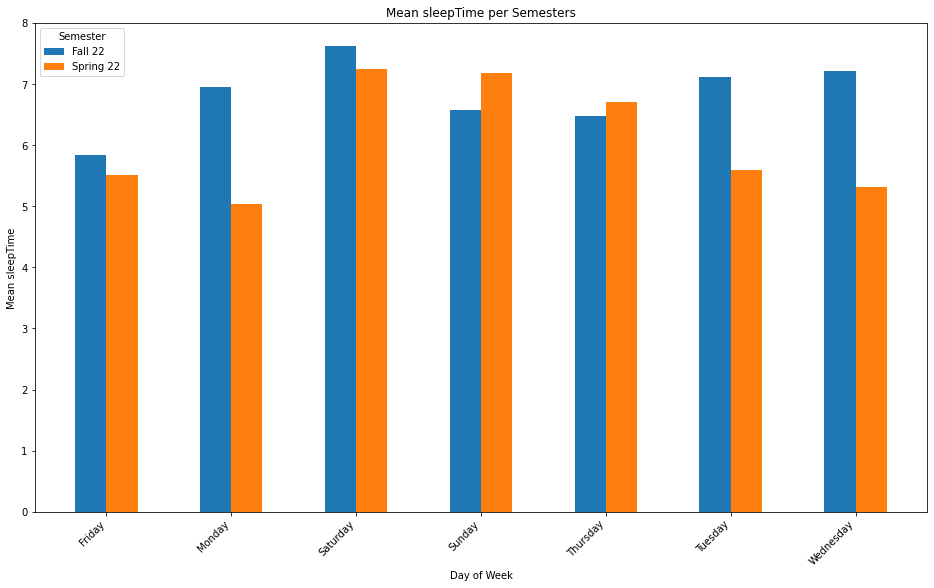

In [15]:
utils.data_visualization(fall_22, spring_22, "sleepTime")

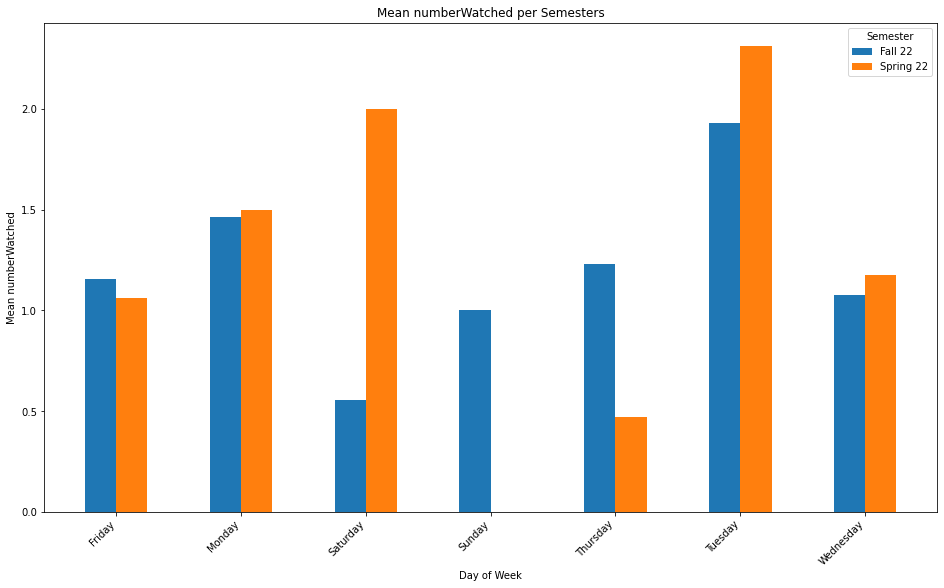

In [16]:
utils.data_visualization(fall_22, spring_22, "numberWatched")

### Hypothesis Testing
 

As my hypothesis is my mean sleep time in Fall 2022 is less than in Spring 2022, I am performing a two-sampled (Fall 2022 and Spring 2022), left-tailed (we want to know which one is greater), independent (the timings are different) test.
 

I choose a level of significance of 0.025 since this is a relatively relaxed one that can be used to interpret a wider population.
 

For the Hypothesis Testing part, I will use "FA" for Fall 2022 and "SP" for Spring 2022.

1. State the null and alternative hypothesis
* $H_0$: $\mu_{FA} \geq \mu_{SP}$
* $H_1$: $\mu_{FA} < \mu_{SP}$

2. Select the significance level
* $\alpha$ = 0.025

3. Select the appropriate test statistic
$$t = \frac {\overline {X_{FA}} - \overline {X_{SP}}}{\sqrt {s_p^2 (\frac {1}{n_{FA}} + \frac {1}{n_{SP}})}}$$

$$\text {where } s_p^2 = \frac{(n_{FA} - 1)s_{FA}^2 + (n_{SP} - 1)s_{SP}^2}{n_{FA} + n_{SP} - 2}$$ 

* $t = \text {t-score}$
* $\overline{X} = \text {Sample mean}$
* $s_p^2 = \text {Pooled variance}$
* $s = \text {Standard deviation}$
* $n = \text {Number of sample}$

4. Formulate decision rule
* $df = n_{FA} + n_{SP} - 2 = 85 + 81 - 2 = 164$
* Critical value: $t_{critical} = -1.975$
* Since $H_1$: $\mu_{Fa} < \mu_{SP}$, we are dealing with left-tailed test. The decision rule is as follow:
    * If $t_{computed} < -1.975$, then *Reject $H_0$*
    * If $t_{computed} \geq -1.975$, then *Do no reject $H_0$*

5. Make the decision
* Compute $t_{computed}$ and $p_{value}$

In [17]:
utils.hypo_2s_1t(spring_22["sleepTime"], fall_22["sleepTime"], 0.025, -1.975)

t_computed is: -4.212142839012363
p_value is: 2.0814377277444424e-05
Reject H0


So, at the 0.025 level of significance, we reject $H_0$, fail to reject $H_1$, and $\mu_{FA} < \mu_{SP}$. My mean sleep time in Fall 2022 is less than Spring 2022.

## Classifications
 
Since I want to predict which day of the week is based on my Netflix activity and sleep time, I decided my class attribution is `dayOfWeek`. There are seven days a week, and since I record my sleep data every day, I should have seven equal distribution groups, for roughly 14.3% each.
 
### Preprocessing
 
For more accurate prediction, I added another attribute to my dataset, called `isWeekday`. `isWeekday` returns "Yes" for a weekday `dayOfWeek` value and "No" for a weekend value.
 
I also drop `creationDate` since this attribute is unique to each instance and uninformative for the prediction process.
 
After that, I use `LabelEncoder()` function from the Sci-kit Learn library to encode categorical attributes, in this case, `dayOfWeek` and `isWeekday`.
 
Finally, I drop my desired class attribute `dayOfWeek` from the feature matrix `X` and assign it to a class vector `y`.
 
The result is as below.

In [18]:
X, y = utils.ml_preprocessing(df)
print(X)
print(y)

     sleepTime  numberAwake  numberWatched  isWeekday
0     6.875833            0            0.0          1
1     7.411944            1            0.0          1
2     8.736389            0            0.0          0
3     8.595278            0            0.0          0
4     7.205833            0            0.0          1
..         ...          ...            ...        ...
445   6.330278            0            9.0          1
446   5.414722            0            2.0          1
447   4.475278            0            0.0          0
448   7.145833            0            0.0          1
449   6.441111            0            5.0          1

[450 rows x 4 columns]
0      4
1      0
2      2
3      3
4      1
      ..
445    4
446    0
447    3
448    1
449    5
Name: dayOfWeek, Length: 450, dtype: int64


### Scaling and Splitting
 
I perform a scaling on the normalized dataset above using `MinMaxScale()` function from the Sci-kit Learn library to avoid inadvertent weighting. Then, I split them into a training set and a testing set using the Holdout Method, with the testing group size taking 25% of the normalized data.

In [19]:
X_train, X_test, y_train, y_test = utils.scale_split(X, y)

### Build KNeighborsClassifier Model

For this model, I built a testing tool to find the number of neighbors used by the KNN Algorithm method that produces the highest accuracy in a range of 1 and 150. I only keep the range between 1 and 150 but not extending it to the entire length of the training set because it does not make sense to have a considerable number of neighbors and produce faulty results. Besides, the marginal difference of better accuracy (if any) with a high number of neighbors is not significant, and it also reduces the program's performance.
 

The result is as below.

In [20]:
utils.kNN_class(X_train, X_test, y_train, y_test)

Best accuracy: 0.36283185840707965 Number of Neighbors: 24


### Build DecisionTreeClassifier Model

The result is as below.

In [21]:
utils.tree_class(X_train, X_test, y_train, y_test)

Accuracy: 0.23893805309734514


### Result Comparision
 
Both methods test the accuracy of the class vector predicted against `y_train`.
 
The results above suggest that with this dataset, the KNeighborsClassifier model yields a higher accuracy rate than the DecisionTreeClassifier model. Although both results' accuracy rate is not extremely high, they are not bad at all, considering the percentage of class distribution is only 14.3%.

## Conclusion
 
This project uses my Apple Health dataset, specifically the sleep information and Netflix Viewing Activity dataset, to investigate the correlation between sleep time and Netflix using activity. The project also tests a hypothesis about whether the sleep time in the Fall 2022 semester is less than in Spring 2022, considering I have more classes and work more in Fall 2022 than in Spring 2022. And the dataset information affirms that hypothesis.
 

Another essential part of this project is to train two machine learning models, DecisionTreeClassifier and KNeighborsClassifier, to predict which day of the week and determine which model yields better accuracy. The best accuracy that this project can produce is 36.3%, coming from the KNeighborsClassifier at a number of neighbors 24. Although the accuracy rate is not too high, I find it significant enough since the class distribution is only about 14.3%, given their sizes are relatively the same. Regardless, I believe this result can be improved if more sleep information is available.
 

Apple Health Sleep Tracking algorithm can be much more precise if used with an Apple Watch. Apple Watch can measure heart rate, respiratory rate, and blood oxygen to determine which stages of sleep one is in (Awake, REM, Deep, or Core). However, I decided to remove the Apple Watch information from the beginning of this project since the data is incomplete - I do not wear my Apple Watch to sleep all the time. Therefore, if this project is to be implemented again in the future, this point should be changed to make a more precise analysis.
 

Besides, I find the Netflix dataset is insufficient and should only be used in conjunction with other providers, i.e., YouTube, Disney+, or so on, as Netflix stopped providing informative statistics but only the content's title. If another dataset can be used, I think it can produce an even higher accuracy rate.
 

With that, hopefully, in the future, this project can serve as a foundation for further study to be conducted, especially in terms of human emotional reactions. I believe watching movies, just like reading books, is an exciting activity that allows people to extend their imagination and reflect on the relevance between their life and the movie's content. Depending on the movie's content, viewers' emotions can be affected, thus, resulting in negative emotions. So, I am confident the more we understand our brain and emotion (such as our defense mechanism), the better decision we can make regarding our daily lives.